*Collaborated with student Sophie Guo, Yitong Zhao, and Fanxi Chen*

### Section 3: Reading data to Pandas dataframes

In [1]:
import pandas as pd

categories = pd.read_excel("../categories.xlsx")
film = pd.read_csv("../film.csv", delimiter = "|", quotechar = "'") # column seperated by "|". also eliminating single quotes around columns

### Section 4: Visualization

In [2]:
# import visualization package
import matplotlib.pyplot as plt

# combining the two datasets to obtain category names
# left join for saver result, join on categoryID
merged = film.merge(categories, how="left", on = "category_id")

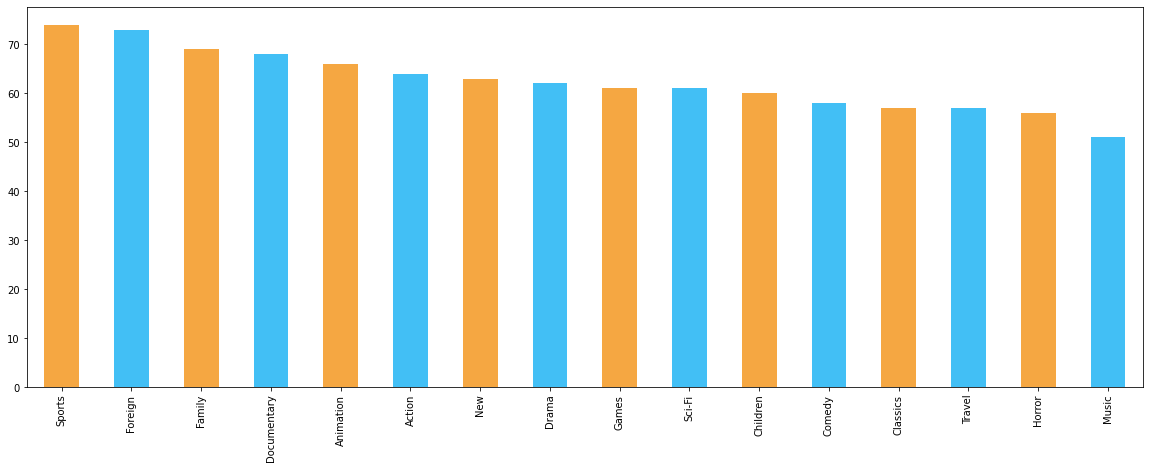

In [3]:
# 1. Plot number of films by category (bar chart)

# method 1: using Pandas bar chart
plt.figure(figsize = (20, 7)) # enlarge canvas
merged["category_name"].value_counts().plot(kind="bar", color = ["#f5a742", "#42bff5"])
plt.show()

<BarContainer object of 16 artists>

<Figure size 432x288 with 0 Axes>

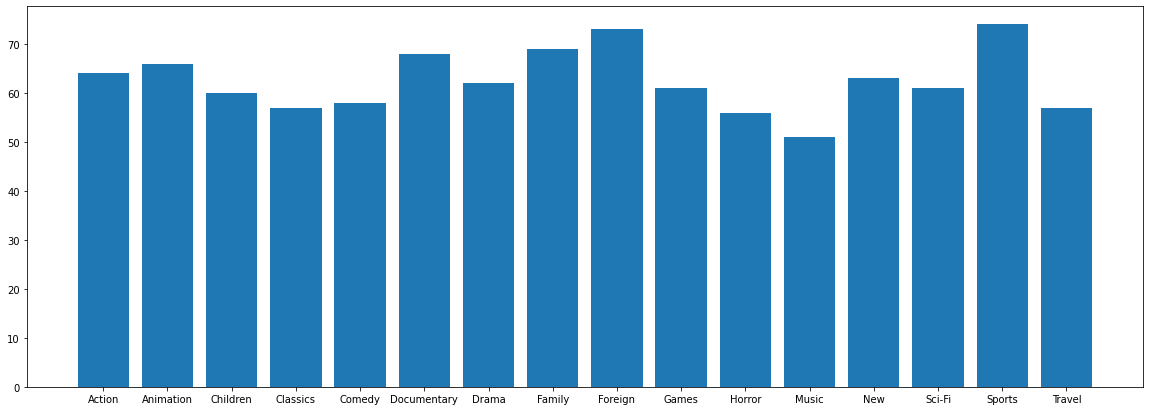

In [4]:
# method 2: using group by and pyplot bar chart
plt.clf()
cc = merged.groupby("category_name")["film_id"].count()
plt.figure(figsize = (20,7))
plt.bar(x = cc.index, height = cc)

<Figure size 432x288 with 0 Axes>

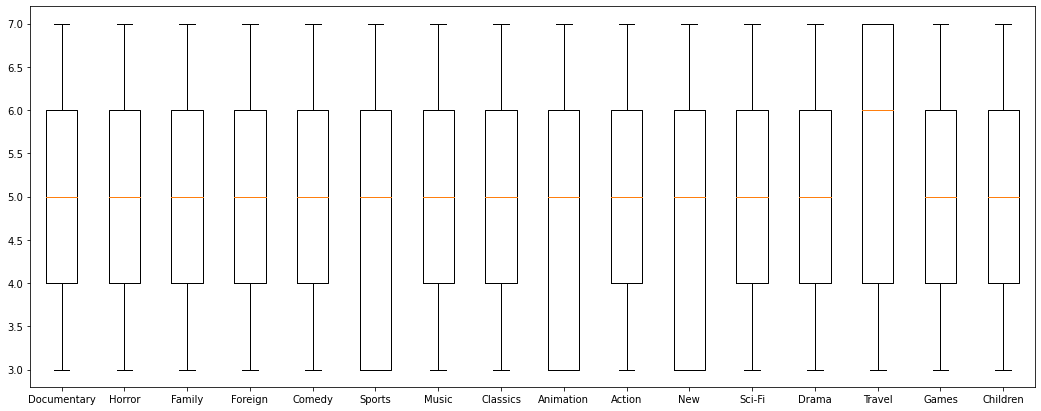

In [5]:
# 2. Plot average rental duration by category with variance (Box and whiskers)

# create a list of catrgory name for looping
cn = list(merged["category_name"].unique()) 
# group durations for each category into a list of list
data = []
for n in cn:
    data.append(list(merged[merged["category_name"]==n]["rental_duration"]))

# plot figure
plt.clf() # clear previous drawing
plt.figure(figsize = (18,7))
plt.boxplot(data) 
plt.xticks(ticks = range(1,17), labels = cn)
plt.show()